In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import kstest
from scipy.stats.distributions import expon

from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import chi2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IAConcentracion2/Copia de 2012_2019_PlatteRiverWeir_features_merged_all.csv')
df.columns = ['SensorTime', 'CaptureTime', 'Filename', 'Agency', 'SiteNumber',
       'TimeZone', 'Stage', 'Discharge', 'CalcTimestamp', 'width',
       'height', 'exposure', 'fNumber', 'isoSpeed', 'shutterSpeed',
       'grayMean', 'graySigma', 'entropyMean', 'entropySigma', 'hMean',
       'hSigma', 'sMean', 'sSigma', 'vMean', 'vSigma', 'areaFeatCount',
       'grayMean 0', 'graySigma 0', 'entropyMean 0', 'entropySigma 0',
       'hMean 0', 'hSigma 0', 'sMean 0', 'sSigma 0', 'vMean 0',
       'vSigma 0', 'grayMean 1', 'graySigma 1', 'entropyMean 1',
       'entropySigma 1', 'hMean 1', 'hSigma 1', 'sMean 1', 'sSigma 1',
       'vMean 1', 'vSigma 1', 'WeirAngle', 'WeirPt1X', 'WeirPt1Y',
       'WeirPt2X', 'WeirPt2Y', 'WwRawLineMin', 'WwRawLineMax',
       'WwRawLineMean', 'WwRawLineSigma', 'WwCurveLineMin',
       'WwCurveLineMax', 'WwCurveLineMean', 'WwCurveLineSigma']

In [ ]:
df = df.drop(['Filename', 'Agency', 'SiteNumber','TimeZone'],axis=1)
df

,SensorTime,CaptureTime,Stage,Discharge,CalcTimestamp,width,height,exposure,fNumber,isoSpeed,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,2.99,916.0,2020-03-11T16:58:28,4288,2848,0.000250,4.0,200,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,2012-06-09 13:15:00,2012-06-09T13:10:29,2.99,916.0,2020-03-11T16:58:33,4288,2848,0.000312,4.0,200,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,2012-06-09 13:45:00,2012-06-09T13:44:01,2.96,873.0,2020-03-11T16:58:40,4288,2848,0.000312,4.0,200,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,2012-06-09 14:45:00,2012-06-09T14:44:30,2.94,846.0,2020-03-11T16:58:47,4288,2848,0.000312,4.0,200,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,2012-06-09 15:45:00,2012-06-09T15:44:59,2.94,846.0,2020-03-11T16:58:55,4288,2848,0.000312,4.0,200,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,2019-10-11 09:00:00,2019-10-11T08:59:53,2.54,434.0,2020-03-12T16:23:53,4288,2848,0.000312,4.0,200,...,2446,1900,9284.0,77521.0,38385.370066,15952.029728,0.0,70085.0,37550.894823,16444.401209
42055,2019-10-11 10:00:00,2019-10-11T09:59:52,2.54,434.0,2020-03-12T16:23:54,4288,2848,0.000250,4.0,200,...,2440,1900,10092.0,74614.0,40162.989292,15467.708856,0.0,70061.0,39397.339095,16009.008049
42056,2019-10-11 11:00:00,2019-10-11T10:59:52,2.54,434.0,2020-03-12T16:23:55,4288,2848,0.000250,4.0,200,...,2447,1900,7067.0,83260.0,42095.946590,16770.357949,0.0,76335.0,41350.006568,17489.374617
42057,2019-10-11 12:00:00,2019-10-11T11:59:53,2.54,434.0,2020-03-12T16:23:56,4288,2848,0.000312,4.0,200,...,2443,1900,6283.0,83045.0,45345.490954,17498.432849,0.0,78882.0,44553.920296,18268.294896


In [ ]:
df.describe()

,Stage,Discharge,width,height,exposure,fNumber,isoSpeed,shutterSpeed,grayMean,graySigma,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
count,42059.000000,42059.000000,42059.000000,42059.000000,42059.000000,42059.000000,42059.000000,42059.000000,42059.000000,42059.000000,...,42059.000000,42059.000000,42059.000000,42059.000000,42059.000000,42059.000000,42059.0,42059.000000,42059.000000,42059.000000
mean,2.878743,970.956439,4288.122114,2848.082170,0.161720,4.001284,200.261537,-0.886029,94.079832,57.578073,...,1898.152025,1632.199410,1977.239592,65649.770061,30264.791367,15731.203913,0.0,60178.912979,29772.190243,15696.114426
std,0.805533,1192.272290,14.458545,9.729114,0.927797,0.087761,31.007433,1.128978,15.028168,9.347902,...,781.483283,661.348746,4652.898679,32223.396961,18033.801170,8019.757666,0.0,30401.134688,17742.927957,8116.052744
min,0.000000,0.000000,4288.000000,2848.000000,0.000125,4.000000,200.000000,-3.000000,55.006235,19.034711,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.280000,213.000000,4288.000000,2848.000000,0.000400,4.000000,200.000000,-1.000000,85.048836,50.844825,...,2065.000000,1900.000000,0.000000,54055.000000,22276.942952,12542.627859,0.0,48217.500000,21865.041625,12283.186085
50%,2.550000,388.000000,4288.000000,2848.000000,0.000800,4.000000,200.000000,-1.000000,93.352083,57.032581,...,2144.000000,1900.000000,0.000000,71156.000000,30991.115132,16836.506394,0.0,64319.000000,30465.611018,16720.918634
75%,3.290000,1350.000000,4288.000000,2848.000000,0.004000,4.000000,200.000000,-1.000000,102.487423,64.489495,...,2264.000000,1900.000000,1869.000000,87312.000000,39182.093440,20831.296076,0.0,80074.500000,38551.906070,20913.502125
max,6.490000,7920.000000,6000.000000,4000.000000,25.000000,13.000000,4000.000000,12.643856,168.998160,86.339792,...,3275.000000,1900.000000,68747.000000,132262.000000,113048.598055,48565.667751,0.0,130865.000000,110286.915789,48267.082318


In [ ]:
df.shape

(42059, 55)

In [ ]:
pd.isna(df).sum()

SensorTime          0
CaptureTime         0
Stage               0
Discharge           0
CalcTimestamp       0
width               0
height              0
exposure            0
fNumber             0
isoSpeed            0
shutterSpeed        0
grayMean            0
graySigma           0
entropyMean         0
entropySigma        0
hMean               0
hSigma              0
sMean               0
sSigma              0
vMean               0
vSigma              0
areaFeatCount       0
grayMean 0          0
graySigma 0         0
entropyMean 0       0
entropySigma 0      0
hMean 0             0
hSigma 0            0
sMean 0             0
sSigma 0            0
vMean 0             0
vSigma 0            0
grayMean 1          0
graySigma 1         0
entropyMean 1       0
entropySigma 1      0
hMean 1             0
hSigma 1            0
sMean 1             0
sSigma 1            0
vMean 1             0
vSigma 1            0
WeirAngle           0
WeirPt1X            0
WeirPt1Y            0
WeirPt2X  

In [ ]:
df_sinTS =  StandardScaler().fit_transform(df.drop(['SensorTime', 'CaptureTime',  'CalcTimestamp'],axis=1))
df_sinTS = pd.DataFrame(df_sinTS,columns=['Stage', 'Discharge', 'width',
       'height', 'exposure', 'fNumber', 'isoSpeed', 'shutterSpeed',
       'grayMean', 'graySigma', 'entropyMean', 'entropySigma', 'hMean',
       'hSigma', 'sMean', 'sSigma', 'vMean', 'vSigma', 'areaFeatCount',
       'grayMean 0', 'graySigma 0', 'entropyMean 0', 'entropySigma 0',
       'hMean 0', 'hSigma 0', 'sMean 0', 'sSigma 0', 'vMean 0',
       'vSigma 0', 'grayMean 1', 'graySigma 1', 'entropyMean 1',
       'entropySigma 1', 'hMean 1', 'hSigma 1', 'sMean 1', 'sSigma 1',
       'vMean 1', 'vSigma 1', 'WeirAngle', 'WeirPt1X', 'WeirPt1Y',
       'WeirPt2X', 'WeirPt2Y', 'WwRawLineMin', 'WwRawLineMax',
       'WwRawLineMean', 'WwRawLineSigma', 'WwCurveLineMin',
       'WwCurveLineMax', 'WwCurveLineMean', 'WwCurveLineSigma'])
df_sinTS

,Stage,Discharge,width,height,exposure,fNumber,isoSpeed,shutterSpeed,grayMean,graySigma,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,0.138117,-0.046094,-0.008446,-0.008446,-0.174038,-0.01463,-0.008435,-0.100952,0.221271,-1.920750,...,-2.430218,-2.469527,-0.424953,-2.037357,-1.678246,-1.961579,0.0,-1.979519,-1.677995,-1.933982
1,0.138117,-0.046094,-0.008446,-0.008446,-0.173971,-0.01463,-0.008435,-0.100952,0.664555,-1.861223,...,-2.430218,-2.469527,-0.424953,-2.037357,-1.678246,-1.961579,0.0,-1.979519,-1.677995,-1.933982
2,0.100875,-0.082160,-0.008446,-0.008446,-0.173971,-0.01463,-0.008435,-0.100952,0.769032,-1.823410,...,-2.430218,-2.469527,-0.424953,-2.037357,-1.678246,-1.961579,0.0,-1.979519,-1.677995,-1.933982
3,0.076046,-0.104807,-0.008446,-0.008446,-0.173971,-0.01463,-0.008435,-0.100952,0.687991,-1.692956,...,-2.430218,-2.469527,-0.424953,-2.037357,-1.678246,-1.961579,0.0,-1.979519,-1.677995,-1.933982
4,0.076046,-0.104807,-0.008446,-0.008446,-0.173971,-0.01463,-0.008435,-0.100952,0.844006,-1.405249,...,-2.430218,-2.469527,-0.424953,-2.037357,-1.678246,-1.961579,0.0,-1.979519,-1.677995,-1.933982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,-0.420526,-0.450369,-0.008446,-0.008446,-0.173971,-0.01463,-0.008435,-0.100952,-0.745749,0.013327,...,0.701044,0.404936,1.570386,0.368408,0.450303,0.027536,0.0,0.325850,0.438417,0.092199
42055,-0.420526,-0.450369,-0.008446,-0.008446,-0.174038,-0.01463,-0.008435,-0.100952,-0.336136,-0.185842,...,0.693367,0.404936,1.744043,0.278193,0.548876,-0.032856,0.0,0.325060,0.542484,0.038553
42056,-0.420526,-0.450369,-0.008446,-0.008446,-0.174038,-0.01463,-0.008435,-0.100952,0.042738,-0.344715,...,0.702324,0.404936,1.093903,0.546511,0.656062,0.129576,0.0,0.531437,0.652539,0.220955
42057,-0.420526,-0.450369,-0.008446,-0.008446,-0.173971,-0.01463,-0.008435,-0.100952,0.173905,-0.512468,...,0.697206,0.404936,0.925404,0.539839,0.836256,0.220362,0.0,0.615217,0.833115,0.316929


In [ ]:
df_sinTS.drop(['WwCurveLineMin','areaFeatCount'],axis=1,inplace=True)

In [ ]:
df_sinTS.describe()

,Stage,Discharge,width,height,exposure,fNumber,isoSpeed,shutterSpeed,grayMean,graySigma,...,WeirPt1Y,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
count,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,...,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04,4.205900e+04
mean,-2.594911e-16,-7.298187e-17,3.421701e-15,8.227566e-15,3.243639e-17,4.125672e-15,4.385670e-16,5.203337e-17,2.270547e-16,-6.108853e-16,...,-1.324486e-16,4.054549e-18,-1.243395e-16,6.216974e-17,-2.257032e-16,2.284062e-16,-5.676368e-17,6.622429e-17,2.162426e-16,1.892123e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-3.573756e+00,-8.143844e-01,-8.445914e-03,-8.445914e-03,-1.741725e-01,-1.462980e-02,-8.434767e-03,-1.872487e+00,-2.600055e+00,-4.123259e+00,...,-2.463590e+00,-2.430218e+00,-2.469527e+00,-4.249530e-01,-2.037357e+00,-1.678246e+00,-1.961579e+00,-1.979519e+00,-1.677995e+00,-1.933982e+00
25%,-7.432973e-01,-6.357318e-01,-8.445914e-03,-8.445914e-03,-1.738761e-01,-1.462980e-02,-8.434767e-03,-1.009520e-01,-6.009450e-01,-7.203036e-01,...,3.045718e-01,2.135042e-01,4.049358e-01,-4.249530e-01,-3.598289e-01,-4.429429e-01,-3.975948e-01,-3.934575e-01,-4.456560e-01,-4.205208e-01
50%,-4.081114e-01,-4.889515e-01,-8.445914e-03,-8.445914e-03,-1.734450e-01,-1.462980e-02,-8.434767e-03,-1.009520e-01,-4.842624e-02,-5.835516e-02,...,3.933533e-01,3.145952e-01,4.049358e-01,-4.249530e-01,1.708788e-01,4.027617e-02,1.378241e-01,1.361836e-01,3.908199e-02,1.262703e-01
75%,5.105462e-01,3.179207e-01,-8.445914e-03,-8.445914e-03,-1.699959e-01,-1.462980e-02,-8.434767e-03,-1.009520e-01,5.594621e-01,7.393642e-01,...,4.366058e-01,4.681512e-01,4.049358e-01,-2.326311e-02,6.722596e-01,4.944830e-01,6.359485e-01,6.544435e-01,4.948349e-01,6.428556e-01
max,4.483120e+00,5.828472e+00,1.184005e+02,1.184005e+02,2.677156e+01,1.025378e+02,1.225443e+02,1.198433e+01,4.985253e+00,3.076847e+00,...,5.845750e-01,1.761860e+00,4.049358e-01,1.435031e+01,2.067225e+00,4.590535e+00,4.094245e+00,2.325141e+00,4.537903e+00,4.013202e+00


In [ ]:
df_sinTS.shape

(42059, 50)

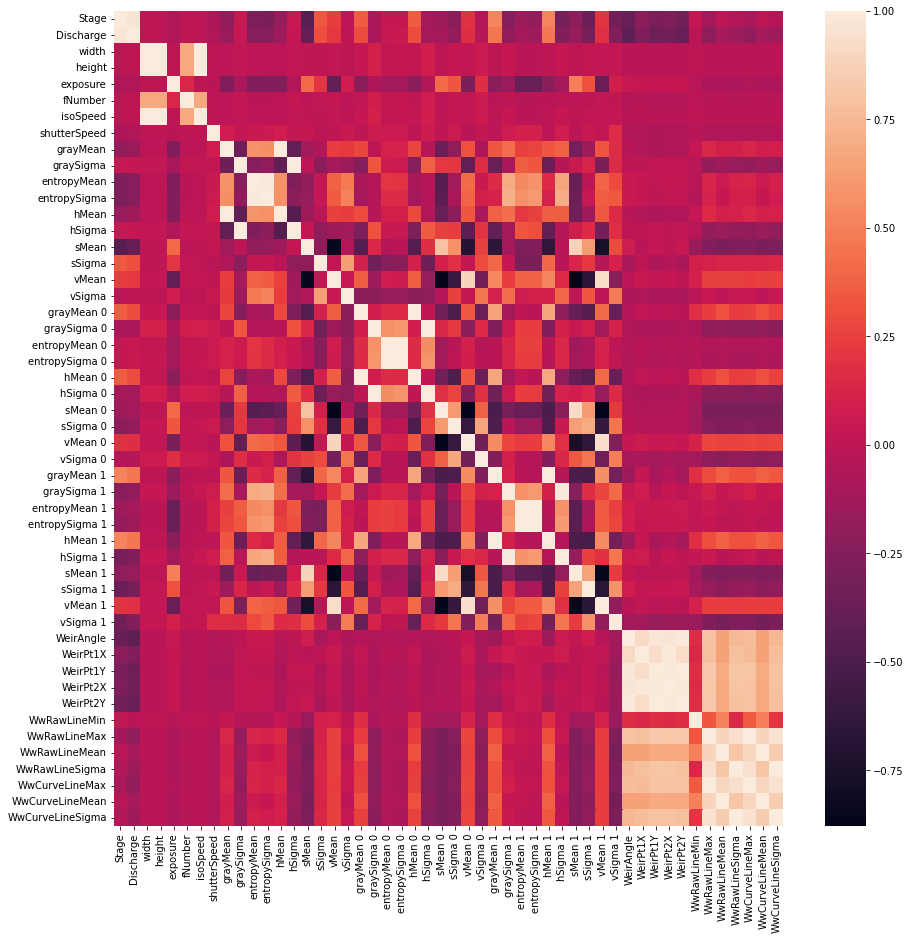

In [ ]:
corr = df_sinTS.corr()
figure = plt.figure(figsize=(15,15))
sns.heatmap(corr)

In [ ]:
np.abs(corr['Stage']).sort_values(ascending=False) #correlaciones de mayor a menor Stage

Stage               1.000000
Discharge           0.970307
hMean 1             0.522462
grayMean 1          0.519797
sMean               0.442171
WeirAngle           0.376217
sSigma 1            0.363119
hMean 0             0.359039
grayMean 0          0.357324
sSigma              0.342982
vSigma 1            0.331320
WeirPt2Y            0.323062
hSigma 1            0.310405
WeirPt1Y            0.295463
entropySigma        0.289390
entropyMean         0.279289
WeirPt2X            0.269775
vMean               0.243047
graySigma 1         0.235976
WeirPt1X            0.214979
sSigma 0            0.214544
sMean 1             0.210605
vMean 1             0.198664
grayMean            0.187599
vMean 0             0.187552
entropySigma 1      0.178652
hMean               0.171718
entropyMean 1       0.146750
sMean 0             0.137696
hSigma 0            0.120584
WwRawLineMax        0.115320
WwCurveLineMax      0.098771
graySigma 0         0.090553
shutterSpeed        0.075291
exposure      

In [ ]:
np.abs(corr['Discharge']).sort_values(ascending=False) #correlaciones de mayor a menor Discharge

Discharge           1.000000
Stage               0.970307
hMean 1             0.465403
grayMean 1          0.463863
WeirAngle           0.419713
sMean               0.385066
WeirPt2Y            0.379252
WeirPt1Y            0.357218
WeirPt2X            0.326738
sSigma 1            0.313220
sSigma              0.308624
hMean 0             0.299070
grayMean 0          0.297169
WeirPt1X            0.267105
vSigma 1            0.262032
hSigma 1            0.258096
entropySigma        0.242141
entropyMean         0.234217
vMean               0.216749
WwRawLineMax        0.207538
graySigma 1         0.193482
WwCurveLineMax      0.193397
sSigma 0            0.181130
vMean 1             0.179615
vMean 0             0.175560
sMean 1             0.172122
grayMean            0.157504
WwRawLineSigma      0.146490
hMean               0.143301
entropySigma 1      0.142745
WwCurveLineSigma    0.131043
entropyMean 1       0.121404
sMean 0             0.118779
hSigma 0            0.110414
WwCurveLineMea

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10bfe9ce50>,
      dtype=object)

<Figure size 720x720 with 0 Axes>

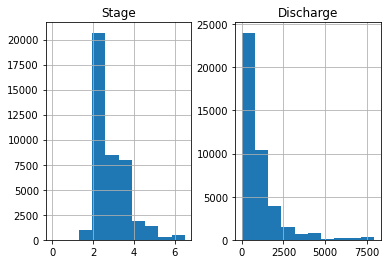

In [ ]:
fig = plt.figure(figsize=(10,10))
df[['Stage','Discharge']].hist()

In [ ]:
points = df_sinTS.drop(['Stage','Discharge'],axis=1)
points = sm.add_constant(points)

regStage = sm.OLS(df_sinTS['Stage'],points)
modelStage = regStage.fit()
print(modelStage.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Stage   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1771.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:59:20   Log-Likelihood:                -36709.
No. Observations:               42059   AIC:                         7.351e+04
Df Residuals:                   42011   BIC:                         7.393e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0018      0.003  

In [ ]:
eliminar = points.columns[modelStage.pvalues > 0.05]
eliminar

Index(['const', 'isoSpeed', 'sMean', 'sSigma 0', 'entropySigma 1', 'WeirAngle',
       'WeirPt2Y', 'WwRawLineSigma', 'WwCurveLineSigma'],
      dtype='object')

In [ ]:
influenceStage = modelStage.get_influence()

In [ ]:
#residuos studentizados
student_resid = influenceStage.resid_studentized_external

outliers = np.where(abs(student_resid) > 2)

In [ ]:
summary = influenceStage.summary_frame()
summary

Summary to csv

In [ ]:
summary.to_csv('summary_influence.csv', index=True)

In [ ]:
files.download('summary_influence.csv')

In [ ]:
df_sinTS.drop(outliers[0],axis=0,inplace=True)
df_sinTS.drop(eliminar[1:],axis=1,inplace=True)

points = df_sinTS.drop(['Stage','Discharge'],axis=1)

In [ ]:
df['CaptureTime']

In [ ]:
df_sinTS.to_csv('df_sinOUT.csv', index=True)

In [ ]:
from google.colab import files
files.download('df_sinOUT.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
regStage = sm.OLS(df_sinTS['Stage'],points)
modelStage = regStage.fit()
print(modelStage.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Stage   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              3695.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                        0.00
Time:                        23:24:07   Log-Likelihood:                         -18190.
No. Observations:               39685   AIC:                                  3.646e+04
Df Residuals:                   39646   BIC:                                  3.679e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
df_sinTS

,Stage,Discharge,width,height,exposure,fNumber,shutterSpeed,grayMean,graySigma,entropyMean,...,vMean 1,vSigma 1,WeirPt1X,WeirPt1Y,WeirPt2X,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwCurveLineMax,WwCurveLineMean
5,0.076046,-0.104807,-0.008446,-0.008446,-0.173971,-0.01463,-0.100952,0.836914,-1.013930,0.578492,...,0.895220,-0.521954,1.131213,0.263596,0.712561,1.828938,1.135872,1.063854,1.168197,1.064396
8,0.125703,-0.057837,-0.008446,-0.008446,-0.173768,-0.01463,-0.100952,-0.906955,1.827842,-0.822167,...,-0.062062,-0.500182,1.352699,0.409288,0.863558,0.736702,-0.155627,-0.130663,-0.126606,-0.131939
9,0.100875,-0.082160,-0.008446,-0.008446,-0.173229,-0.01463,-0.100952,-2.008087,0.689068,-1.443917,...,-0.328979,-0.047864,-2.293723,-2.463590,-2.430218,-0.424953,-2.037357,-1.678246,-1.979519,-1.677995
10,0.113289,-0.070418,-0.008446,-0.008446,-0.039578,-0.01463,-0.100952,-0.794091,0.315094,-1.024502,...,-1.691000,-0.514981,-2.293723,-2.463590,-2.430218,-0.424953,-2.037357,-1.678246,-1.979519,-1.677995
13,0.113289,-0.070418,-0.008446,-0.008446,-0.173229,-0.01463,-0.100952,-0.590581,1.362151,0.478947,...,-0.913638,0.843241,1.595794,0.516282,1.008156,-0.424953,-0.222877,-0.157487,-0.163250,-0.146203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,-0.420526,-0.450369,-0.008446,-0.008446,-0.173971,-0.01463,-0.100952,-0.745749,0.013327,1.200209,...,0.043492,-0.269922,1.033975,0.370589,0.701044,1.570386,0.368408,0.450303,0.325850,0.438417
42055,-0.420526,-0.450369,-0.008446,-0.008446,-0.174038,-0.01463,-0.100952,-0.336136,-0.185842,1.583411,...,0.072330,-0.270840,1.023171,0.363759,0.693367,1.744043,0.278193,0.548876,0.325060,0.542484
42056,-0.420526,-0.450369,-0.008446,-0.008446,-0.174038,-0.01463,-0.100952,0.042738,-0.344715,1.836003,...,0.126257,-0.372708,1.033975,0.375142,0.702324,1.093903,0.546511,0.656062,0.531437,0.652539
42057,-0.420526,-0.450369,-0.008446,-0.008446,-0.173971,-0.01463,-0.100952,0.173905,-0.512468,1.971996,...,0.206751,-0.511989,1.025872,0.370589,0.697206,0.925404,0.539839,0.836256,0.615217,0.833115


In [ ]:
X = df_sinTS.drop(['Stage','Discharge'], axis=1)
y = df_sinTS['Stage']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
modeloJ = LinearRegression()
modeloJ.fit(X_train, y_train)

modeloJ.score(X_test, y_test)

0.7849226541265852

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train,y_train)

mlp.score(X_test, y_test)

0.9179706388467359

Modelo Stage sin valores altos de apalancamiento

In [ ]:
from statsmodels.iolib.summary import summary

In [ ]:
leverage = influenceStage.hat_matrix_diag

p = X_train.shape[1] - 1
cutoff = (2*p+2)/20640

leverage_test = leverage > cutoff
high_leverage_points = np.where(leverage_test)

summary.iloc[high_leverage_points]

,dfb_const,dfb_width,dfb_height,dfb_exposure,dfb_fNumber,dfb_isoSpeed,dfb_shutterSpeed,dfb_grayMean,dfb_graySigma,dfb_entropyMean,...,dfb_WwRawLineSigma,dfb_WwCurveLineMax,dfb_WwCurveLineMean,dfb_WwCurveLineSigma,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
11,-0.262947,-0.883038,0.883038,-0.148471,0.002437,-0.008540,0.021761,-0.018113,0.016471,0.003337,...,-0.006712,0.014826,0.007620,0.008070,3.982224e-04,-2.172399,0.004118,-0.139689,-2.172494,-0.139695
25,-0.272642,-0.886314,0.886314,-0.029023,-0.002055,-0.005244,0.030686,0.003810,-0.013267,0.068914,...,0.005267,-0.010805,-0.000287,-0.004600,1.884121e-03,-4.059659,0.005571,-0.303845,-4.060378,-0.303899
26,-0.270293,-0.881576,0.881576,-0.035778,-0.014967,-0.014264,0.044151,-0.025866,-0.015407,0.122270,...,-0.000072,-0.005821,-0.008274,-0.000980,2.170302e-03,-3.791688,0.007343,-0.326106,-3.792293,-0.326158
58,-0.252393,-0.886155,0.886155,-0.034432,-0.006721,-0.004316,0.020930,-0.023446,0.002159,-0.001935,...,0.001411,0.003430,0.002403,-0.000443,3.876656e-06,0.214527,0.004111,0.013782,0.214523,0.013782
127,-0.254277,-0.888839,0.888839,-0.036498,-0.002936,-0.003264,0.016708,-0.002799,-0.006447,-0.003660,...,0.002510,0.004866,0.000486,0.000488,3.012842e-07,-0.055488,0.004772,-0.003842,-0.055487,-0.003842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40795,-0.254249,-0.887492,0.887492,-0.051252,-0.012324,-0.011918,0.009272,-0.008103,-0.003552,0.001181,...,0.000196,0.001354,0.000657,0.001120,1.072533e-06,-0.116180,0.003878,-0.007249,-0.116180,-0.007249
40810,-0.255567,-0.886500,0.886500,-0.034457,-0.015129,-0.007529,0.016821,-0.006346,-0.005148,-0.002120,...,-0.000845,0.002044,-0.000547,0.001851,2.698681e-05,-0.439279,0.006806,-0.036364,-0.439275,-0.036364
41120,-0.252913,-0.883583,0.883583,-0.048790,0.006170,-0.013668,0.007876,-0.020361,-0.005728,0.004433,...,0.000777,0.001928,0.000693,-0.000273,1.432127e-07,-0.026122,0.010180,-0.002649,-0.026121,-0.002649
41226,-0.251435,-0.883469,0.883469,-0.020390,-0.003164,-0.006255,0.015381,-0.014015,0.008454,-0.000623,...,0.000745,0.001132,-0.000574,0.000586,1.389602e-05,0.281372,0.008527,0.026094,0.281370,0.026094


In [ ]:
index_leverage = summary.iloc[high_leverage_points]
X_train_leverage = X_train.loc[~X_train.index.isin(index_leverage)]
y_train_leverage = y_train.loc[~X_train.index.isin(index_leverage)]

Modelo sin apalancamiento y outliers

In [ ]:
regStage_nleverage = sm.OLS(y_train_leverage, X_train_leverage)
modelStage_nleverage = regStage_nleverage.fit()
print(modelStage_nleverage.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Stage   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              2614.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        00:30:31   Log-Likelihood:                         -12561.
No. Observations:               27779   AIC:                                  2.520e+04
Df Residuals:                   27740   BIC:                                  2.552e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Modelo Stage sin valores altos de distancia de Cook

In [ ]:
(cooks, p) = influenceStage.cooks_distance

cutoff = 3*cooks.mean()

cook_distance_test = cooks > cutoff
high_cook_distance_points = np.where(cook_distance_test)

summary.iloc[high_cook_distance_points]

,dfb_const,dfb_width,dfb_height,dfb_exposure,dfb_fNumber,dfb_isoSpeed,dfb_shutterSpeed,dfb_grayMean,dfb_graySigma,dfb_entropyMean,...,dfb_WwRawLineSigma,dfb_WwCurveLineMax,dfb_WwCurveLineMean,dfb_WwCurveLineSigma,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits


Modelo sin valores altos de DFFIT

In [ ]:

(dffits, p) = influenceStage.dffits

cutoff = 2/math.sqrt(p/20640)

dffit_test = abs(dffits) > cutoff
high_dffit_points = np.where(dffit_test)

summary.iloc[high_dffit_points]

,dfb_const,dfb_width,dfb_height,dfb_exposure,dfb_fNumber,dfb_isoSpeed,dfb_shutterSpeed,dfb_grayMean,dfb_graySigma,dfb_entropyMean,...,dfb_WwRawLineSigma,dfb_WwCurveLineMax,dfb_WwCurveLineMean,dfb_WwCurveLineSigma,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits


Modelo sin valores altos de Betas

In [ ]:
cutoff =  2/math.sqrt(20640)

dfbetas = [x for x in summary.columns.to_list() if ('dfb' in x)]

high_beta_test = []
high_beta_points = []

for beta in dfbetas:    
    
    test = (summary[beta] > cutoff).to_numpy()    
    high_beta_test.append(test)
    
    points = np.where(dffit_test)
    high_beta_points.append(points)
    
    print(summary[beta].iloc[points])

Series([], Name: dfb_const, dtype: float64)
Series([], Name: dfb_width, dtype: float64)
Series([], Name: dfb_height, dtype: float64)
Series([], Name: dfb_exposure, dtype: float64)
Series([], Name: dfb_fNumber, dtype: float64)
Series([], Name: dfb_isoSpeed, dtype: float64)
Series([], Name: dfb_shutterSpeed, dtype: float64)
Series([], Name: dfb_grayMean, dtype: float64)
Series([], Name: dfb_graySigma, dtype: float64)
Series([], Name: dfb_entropyMean, dtype: float64)
Series([], Name: dfb_entropySigma, dtype: float64)
Series([], Name: dfb_hMean, dtype: float64)
Series([], Name: dfb_hSigma, dtype: float64)
Series([], Name: dfb_sMean, dtype: float64)
Series([], Name: dfb_sSigma, dtype: float64)
Series([], Name: dfb_vMean, dtype: float64)
Series([], Name: dfb_vSigma, dtype: float64)
Series([], Name: dfb_grayMean 0, dtype: float64)
Series([], Name: dfb_graySigma 0, dtype: float64)
Series([], Name: dfb_entropyMean 0, dtype: float64)
Series([], Name: dfb_entropySigma 0, dtype: float64)
Series([]